# Gradient decent
## Mateusz Baran
### 155620

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
sns.set_style('darkgrid')
np.random.seed(seed=13)

In [111]:
# define the vector of input samples as x, with 20 values
# sample form a uniform distribution between 0 and 1
X = np.random.uniform(0, 1, 20)

In [112]:
# create the target values t from x with small gaussian noice
# so the estimation won't be perfect
# define a function f that represents the line that generates t
# wihout noice
def f(x):
    return x * 2

In [113]:
# create the targets t with same gaussian noise
noice_variance = 0.2
# gausian noice error for each sample in X
noise = np.random.randn(X.shape[0]) * noice_variance
t = f(X) + noise

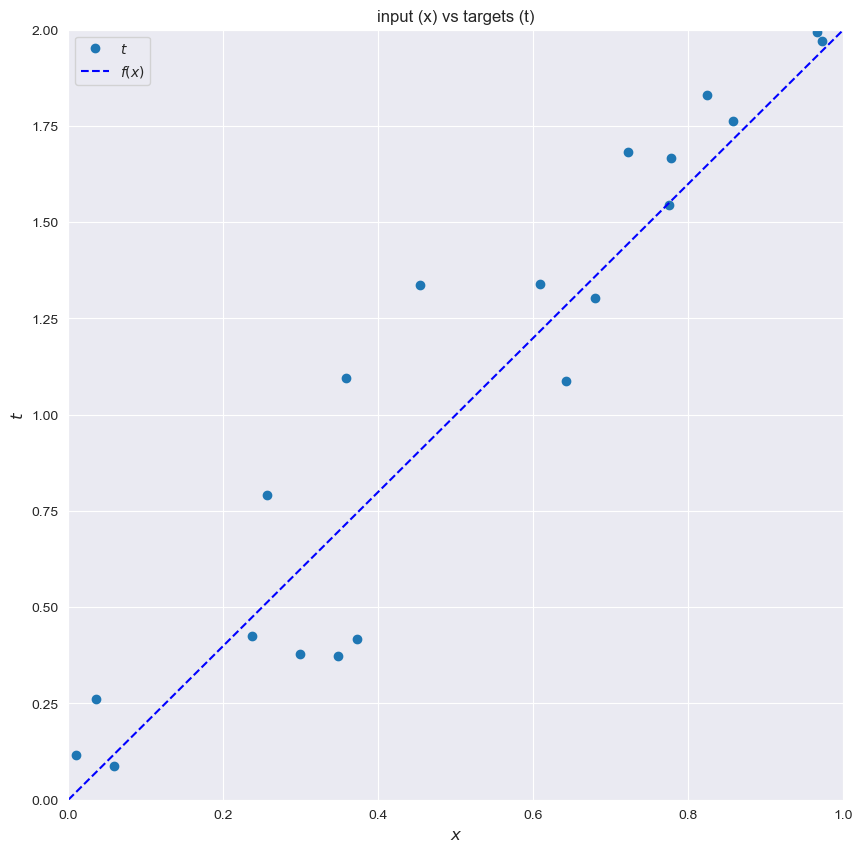

In [114]:
plt.figure(figsize=(10,10))
plt.plot(X, t, 'o', label='$t$')
plt.plot([0,1], [f(0), f(1)], 'b--', label='$f(x)$')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$t$', fontsize=12)
plt.axis((0, 1, 0, 2))
plt.title('input (x) vs targets (t)')
plt.legend(loc=2)
plt.show()

In [115]:
def nn(x, w):
    """Output function y = x * w"""
    return x * w

def loss(y, t):
    """MSE loss function."""
    return np.mean((t - y) ** 2)

In [116]:
ws = np.linspace(0, 4, num=100)
loss_ws = np.vectorize(lambda w: loss(nn(X, w), t))(ws)

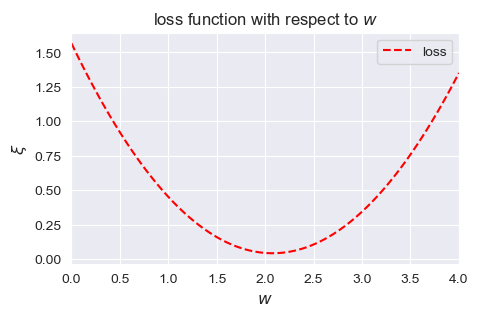

In [117]:
plt.figure(figsize=(5, 3))
plt.plot(ws, loss_ws, 'r--', label='loss')
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('loss function with respect to $w$')
plt.xlim(0, 4)
plt.legend()
plt.show()

In [118]:
def gradient(w, x , t):
    """Gradient function. (Remember that y=nn(x,w) = x * w"""
    return 2 * x * (nn(x, w) - t)

def delta_w(w_k, x, t, learning_rate):
    """Update function delta w"""
    return learning_rate * np.mean(gradient(w_k, x, t))

In [119]:
# initial weight parameter
w = np.random.rand()
# set the learning rate
learning_rate = 0.9

# Perform the gradient descent updates and print the weights and loss:
nb_of_iterations = 4 # number of gradient descent updates
w_loss = [(w, loss(nn(X, w), t))]
for i in range(nb_of_iterations):
    dw = delta_w(w, X, t, learning_rate) # delta w udpate
    w = w - dw  # update the current weight parameter
    w_loss.append((w, loss(nn(X, w), t))) # save weight and loss
    
# print the final w and loss
for i in range(0, len(w_loss)):
    print(f'w({i}): {w_loss[i][0]:.4f} \t loss: {w_loss[i][1]:.4f}')

w(0): 0.1380 	 loss: 1.3710
w(1): 1.3722 	 loss: 0.2174
w(2): 1.8205 	 loss: 0.0651
w(3): 1.9834 	 loss: 0.0451
w(4): 2.0426 	 loss: 0.0424


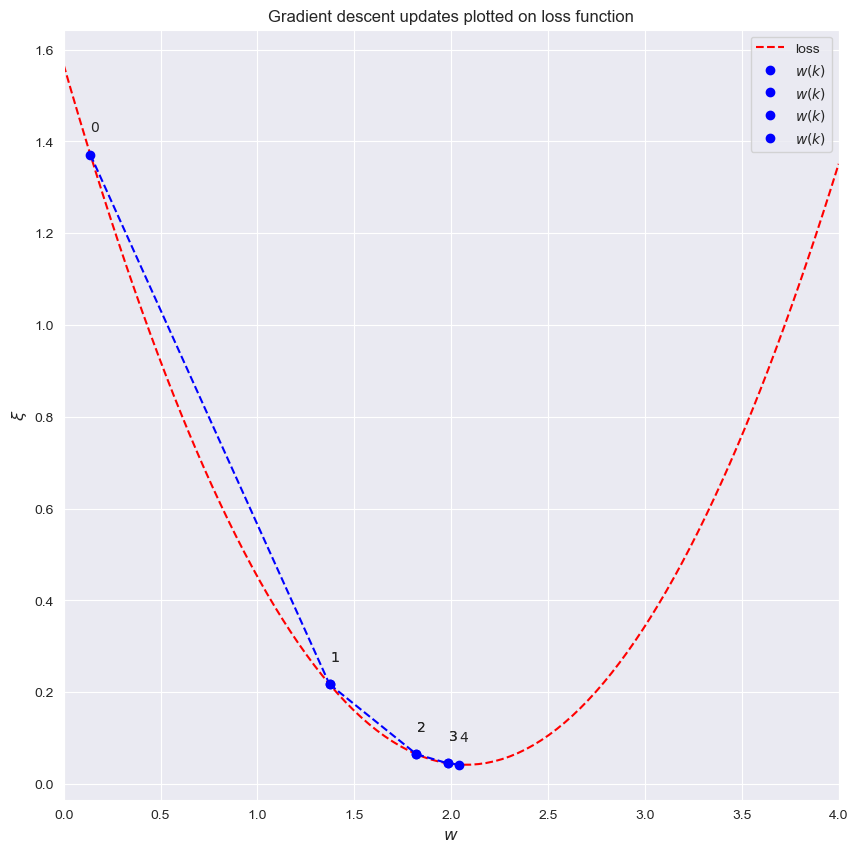

In [120]:
# visual the gradient descent updates

plt.figure(figsize=(10, 10))
plt.plot(ws, loss_ws, 'r--', label='loss') # loss curve

for i in range(0, len(w_loss) - 1):
    w1, c1 = w_loss[i]
    w2, c2 = w_loss[i+1]
    plt.plot(w1, c1 , 'bo')
    plt.plot([w1, w2], [c1, c2], 'b--')
    plt.text(w1, c1+0.05, f'${i}$')
    plt.plot(w2, c2, 'bo', label='$w(k)$')
    plt.text(w2, c2+0.05, f'${i+1}$')
# show figure
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('Gradient descent updates plotted on loss function')
plt.xlim(0, 4)
plt.legend(loc=1)
plt.show()

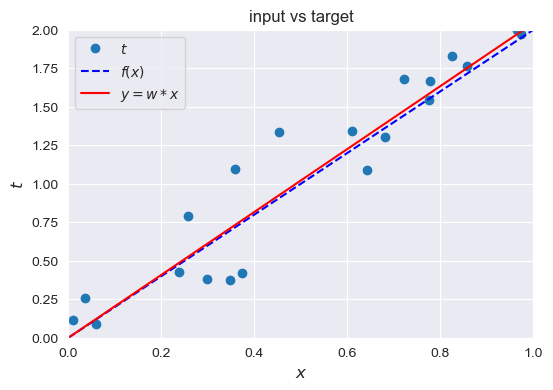

In [121]:
# plot the fitted lone again the target lone

plt.figure(figsize=(6, 4))
plt.plot(X, t, 'o', label='$t$')
plt.plot([0, 1], [f(0), f(1)], 'b--', label='$f(x)$')
plt.plot([0, 1], [0*w, 1*w], 'r-', label='$y = w * x$')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$t$', fontsize=12)
plt.title('input vs target')
plt.legend(loc=2)
plt.ylim(0, 2)
plt.xlim(0, 1)
plt.show()

w(0): 0.0988 	 loss: 1.4254
w(1): 0.7983 	 loss: 0.6198
w(2): 1.2504 	 loss: 0.2833
w(3): 1.5425 	 loss: 0.1428
w(4): 1.7314 	 loss: 0.0841
w(5): 1.8534 	 loss: 0.0596


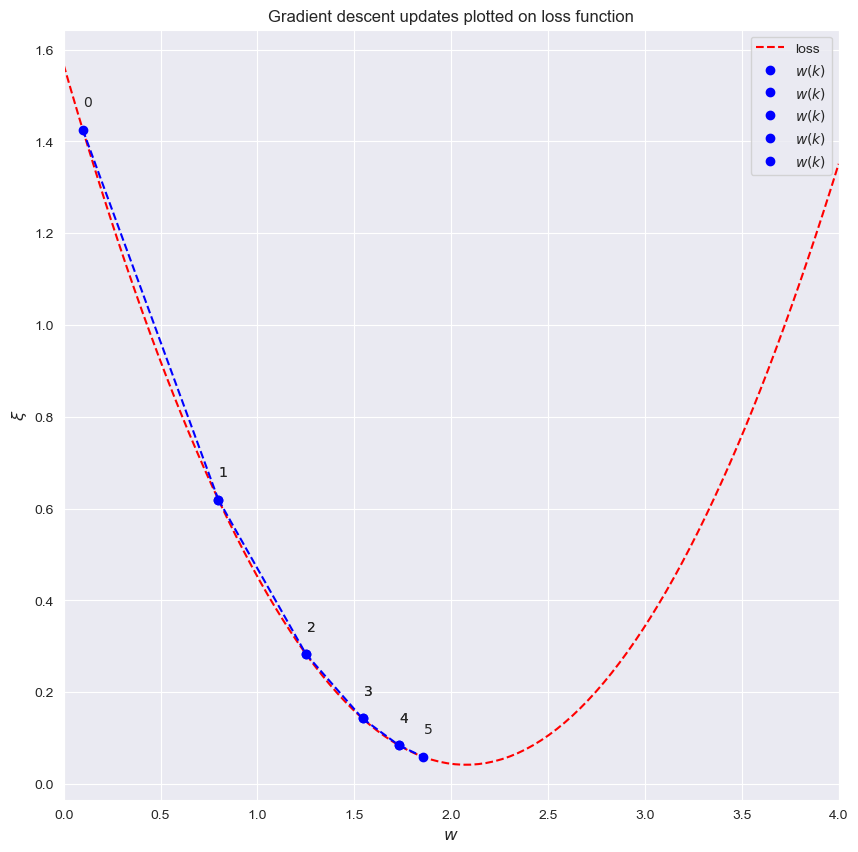

In [122]:
# initial weight parameter
w = np.random.rand()
# set the learning rate
learning_rate = 0.5

# Perform the gradient descent updates and print the weights and loss:
nb_of_iterations = 5 # number of gradient descent updates
w_loss = [(w, loss(nn(X, w), t))]
for i in range(nb_of_iterations):
    dw = delta_w(w, X, t, learning_rate) # delta w udpate
    w = w - dw  # update the current weight parameter
    w_loss.append((w, loss(nn(X, w), t))) # save weight and loss

# print the final w and loss
for i in range(0, len(w_loss)):
    print(f'w({i}): {w_loss[i][0]:.4f} \t loss: {w_loss[i][1]:.4f}')

# visual the gradient descent updates

plt.figure(figsize=(10, 10))
plt.plot(ws, loss_ws, 'r--', label='loss') # loss curve

for i in range(0, len(w_loss) - 1):
    w1, c1 = w_loss[i]
    w2, c2 = w_loss[i+1]
    plt.plot(w1, c1 , 'bo')
    plt.plot([w1, w2], [c1, c2], 'b--')
    plt.text(w1, c1+0.05, f'${i}$')
    plt.plot(w2, c2, 'bo', label='$w(k)$')
    plt.text(w2, c2+0.05, f'${i+1}$')
# show figure
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('Gradient descent updates plotted on loss function')
plt.xlim(0, 4)
plt.legend(loc=1)
plt.show()

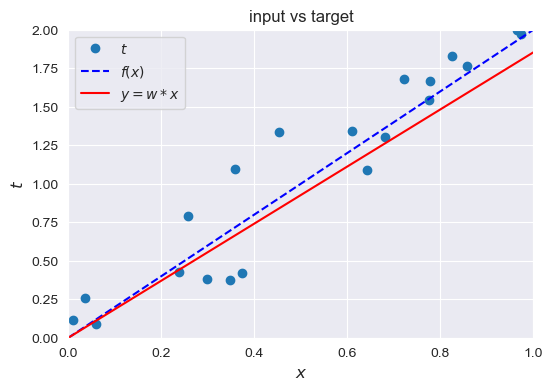

In [123]:
# plot the fitted lone again the target lone

plt.figure(figsize=(6, 4))
plt.plot(X, t, 'o', label='$t$')
plt.plot([0, 1], [f(0), f(1)], 'b--', label='$f(x)$')
plt.plot([0, 1], [0*w, 1*w], 'r-', label='$y = w * x$')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$t$', fontsize=12)
plt.title('input vs target')
plt.legend(loc=2)
plt.ylim(0, 2)
plt.xlim(0, 1)
plt.show()

w(0): 0.2456 	 loss: 1.2276
w(1): 0.3751 	 loss: 1.0658
w(2): 0.4954 	 loss: 0.9260
w(3): 0.6073 	 loss: 0.8054
w(4): 0.7112 	 loss: 0.7012
w(5): 0.8078 	 loss: 0.6112
w(6): 0.8975 	 loss: 0.5335
w(7): 0.9809 	 loss: 0.4664
w(8): 1.0584 	 loss: 0.4085
w(9): 1.1304 	 loss: 0.3585
w(10): 1.1974 	 loss: 0.3153
w(11): 1.2595 	 loss: 0.2780
w(12): 1.3173 	 loss: 0.2458
w(13): 1.3710 	 loss: 0.2180
w(14): 1.4209 	 loss: 0.1939
w(15): 1.4673 	 loss: 0.1732
w(16): 1.5104 	 loss: 0.1553
w(17): 1.5504 	 loss: 0.1398
w(18): 1.5876 	 loss: 0.1265
w(19): 1.6222 	 loss: 0.1149
w(20): 1.6543 	 loss: 0.1050
w(21): 1.6842 	 loss: 0.0964
w(22): 1.7119 	 loss: 0.0890
w(23): 1.7377 	 loss: 0.0826
w(24): 1.7617 	 loss: 0.0770
w(25): 1.7839 	 loss: 0.0722
w(26): 1.8046 	 loss: 0.0681
w(27): 1.8238 	 loss: 0.0645
w(28): 1.8417 	 loss: 0.0615
w(29): 1.8583 	 loss: 0.0588
w(30): 1.8737 	 loss: 0.0565
w(31): 1.8880 	 loss: 0.0545
w(32): 1.9014 	 loss: 0.0528
w(33): 1.9137 	 loss: 0.0513
w(34): 1.9252 	 loss: 0.

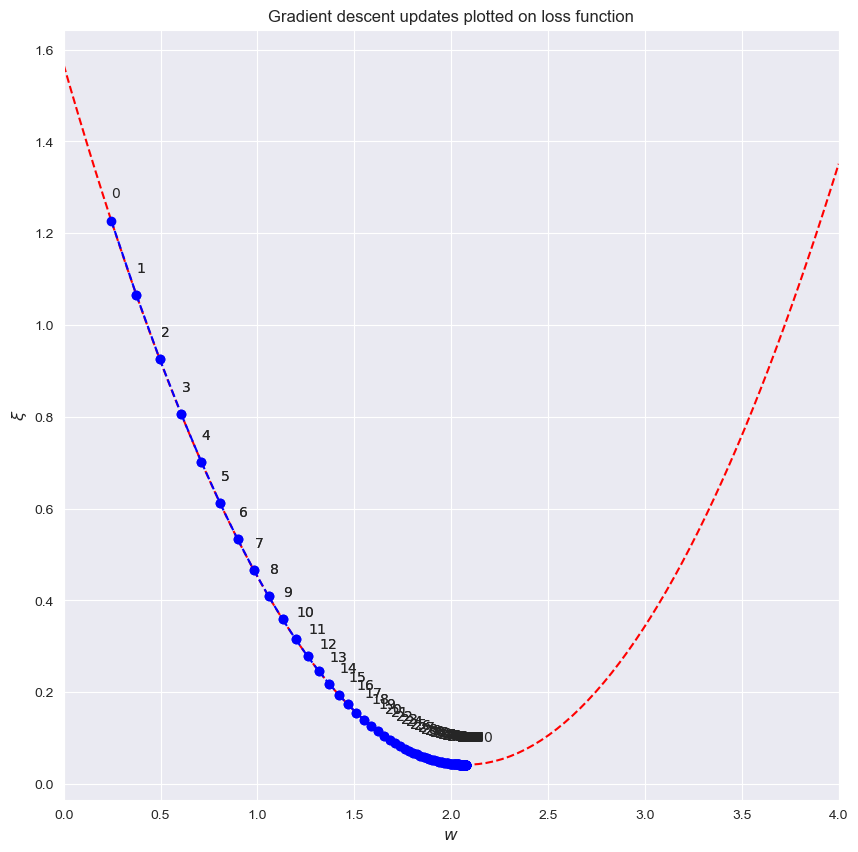

In [124]:
# initial weight parameter
w = np.random.rand()
# set the learning rate
learning_rate = 0.1

# Perform the gradient descent updates and print the weights and loss:
nb_of_iterations = 100 # number of gradient descent updates
w_loss = [(w, loss(nn(X, w), t))]
for i in range(nb_of_iterations):
    dw = delta_w(w, X, t, learning_rate) # delta w udpate
    w = w - dw  # update the current weight parameter
    w_loss.append((w, loss(nn(X, w), t))) # save weight and loss

# print the final w and loss
for i in range(0, len(w_loss)):
    print(f'w({i}): {w_loss[i][0]:.4f} \t loss: {w_loss[i][1]:.4f}')

# visual the gradient descent updates

plt.figure(figsize=(10, 10))
plt.plot(ws, loss_ws, 'r--', label='loss') # loss curve

for i in range(0, len(w_loss) - 1):
    w1, c1 = w_loss[i]
    w2, c2 = w_loss[i+1]
    plt.plot(w1, c1 , 'bo')
    plt.plot([w1, w2], [c1, c2], 'b--')
    plt.text(w1, c1+0.05, f'${i}$')
    plt.plot(w2, c2, 'bo', label='$w(k)$')
    plt.text(w2, c2+0.05, f'${i+1}$')
# show figure
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('Gradient descent updates plotted on loss function')
plt.xlim(0, 4)
plt.show()

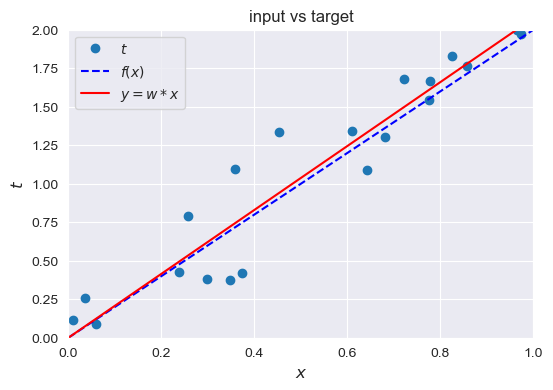

In [125]:
# plot the fitted lone again the target lone

plt.figure(figsize=(6, 4))
plt.plot(X, t, 'o', label='$t$')
plt.plot([0, 1], [f(0), f(1)], 'b--', label='$f(x)$')
plt.plot([0, 1], [0*w, 1*w], 'r-', label='$y = w * x$')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$t$', fontsize=12)
plt.title('input vs target')
plt.legend(loc=2)
plt.ylim(0, 2)
plt.xlim(0, 1)
plt.show()

Jak widać no powyższych przykłądach, im mniejszy learning rate, tym więcej iteracji jest potrzebne do osiągnięcia minimum